# Generalized linear regression

With linear regression, we model the response variable $y$ as coming from a normal distribution whose parameter $\mu$ depends on one or more predictor variables $x$. In many cases, $y$ is not a continuous variable and this does not work. For example, $y$ may be binary or discrete. 

We want to use a linear model because very effective computational algorithms have been developed to handle large linear systems, allowing these models to scale to very large systems. Generalized linear models (GLM) provide a way to cast non-continuous data in the linear regression framework. The two most important concepts for understanding GLMs are the **distribution** family that $y$ is assumed to be sampled from, and the **link** function that relates the key parameter of the distribution to a linear function of the predictor variables $x$. This notebook will illustrate these concepts by example.

In [1]:
library(ggplot2)

In [2]:
options(repr.plot.width=4, repr.plot.height=3)

## Linear Regression

In [3]:
n <- 50
z <- seq(-10, 10, length.out = n)
a <- 3
b <- 4
x <- a + b*z
mu = identity(x) # link function
y <- rnorm(n, mu, 2) # distribution family

In [4]:
df <- data.frame(x=x, y=y)

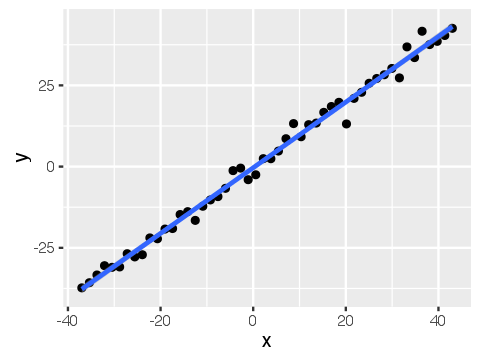

In [5]:
ggplot(df, aes(x=x, y=y)) + geom_point() + geom_smooth(method="lm")

In [6]:
fit.lm <- lm(y ~ x, data=df)

In [7]:
summary(fit.lm)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8677 -1.0849  0.0096  1.0779  5.1601 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.34893    0.30760  -1.134    0.262    
x            1.01041    0.01295  78.017   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.158 on 48 degrees of freedom
Multiple R-squared:  0.9922,	Adjusted R-squared:  0.992 
F-statistic:  6087 on 1 and 48 DF,  p-value: < 2.2e-16


In [8]:
fit.glm <- glm(y ~ x, gaussian(link="identity"), df)

In [9]:
summary(fit.glm)


Call:
glm(formula = y ~ x, family = gaussian(link = "identity"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.8677  -1.0849   0.0096   1.0779   5.1601  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.34893    0.30760  -1.134    0.262    
x            1.01041    0.01295  78.017   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 4.655424)

    Null deviance: 28559.21  on 49  degrees of freedom
Residual deviance:   223.46  on 48  degrees of freedom
AIC: 222.75

Number of Fisher Scoring iterations: 2


## Logistic regression

A natural model to use when $y$ is binary is the binomial distribution, where the number of successes is a function of $p$. To use a linear model, we somehow need to relate the parameter $p$ to a linear function of the predictor variables $a + bx$. Logistic and the closely related probit regression are members of the GLM family that do this.

In [10]:
logit <- function(x) {
    log(x/1-x)
}

In [11]:
ilogit <- function(x) {
    1/(1 + exp(-x))
}

In [12]:
n <- 50
z = rnorm(n, 0, 2)  
x <- a + b*z
mu = ilogit(x) # inverse link function
y = rbinom(n, 1, prob = mu)  # distribution family

In [13]:
df <- data.frame(x=x, y=y)

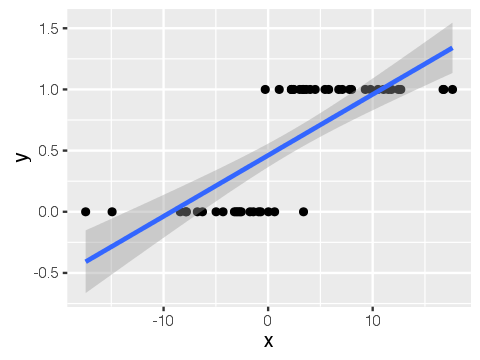

In [14]:
ggplot(df, aes(x=x, y=y)) + geom_point() + geom_smooth(method=lm)

In [15]:
fit.glm.logit <- glm(y ~ x, family = binomial(link = "logit"), df)
summary(fit.glm.logit)


Call:
glm(formula = y ~ x, family = binomial(link = "logit"), data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.40389  -0.07397   0.00206   0.10414   1.73018  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.9369     0.7789  -1.203  0.22900   
x             1.1135     0.3882   2.869  0.00412 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.029  on 49  degrees of freedom
Residual deviance: 14.816  on 48  degrees of freedom
AIC: 18.816

Number of Fisher Scoring iterations: 8


In [16]:
yhat <- predict(fit.glm.logit, newdata <- data.frame(x=x))
mu <- ilogit(yhat)

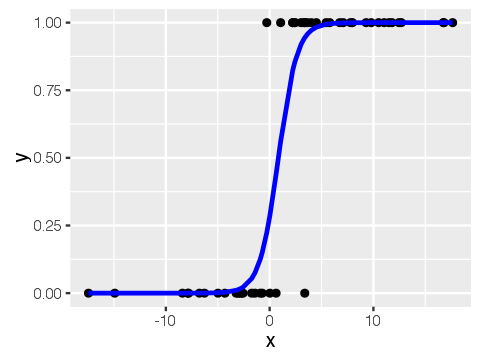

In [17]:
ggplot(df, aes(x=x, y=y)) + geom_point() + geom_line(aes(y=mu), color="blue", size=1)

### Checking for overdispersion

Since the binomial variance is fixed by $p$, overdispersion is possible.

In deviance over the degree of freedom is much larger than 1, use the "quasibinomial" family, which is like the binomial but with an additional parameter to account for the extra variance. 

In [21]:
deviance(fit.glm.logit)/df.residual(fit.glm.logit)

[1] 0.3086666

## Probit regression

In [18]:
fit.glm.probit <- glm(y ~ x, family = binomial(link = "probit"), df)
summary(fit.glm.probit)

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = y ~ x, family = binomial(link = "probit"), data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.35328  -0.03056   0.00000   0.06574   1.70899  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.5615     0.4221  -1.330  0.18339   
x             0.6186     0.1927   3.209  0.00133 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.029  on 49  degrees of freedom
Residual deviance: 14.855  on 48  degrees of freedom
AIC: 18.855

Number of Fisher Scoring iterations: 9


## Poisson regression

When $y$ is a count outcome, it may be possible to model it as coming from a Poisson distribution. Now we need to relate the $\lambda$ (rate) parameter of the Poisson distribution to the linear function of the predictor variables $a + bx$ in order to use a GLM. 

In [22]:
n <- 50
z <- seq(-1, 1, length.out = n)
a <- 0.1
b <- 0.2
x <- a + b*z 
mu = exp(x) # inverse link functiony
y <- rpois(n, lambda = mu) # distribution family

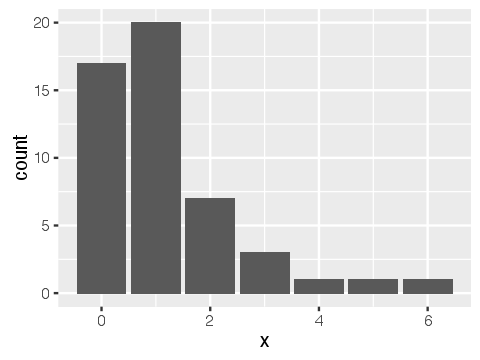

In [23]:
ggplot(data.frame(x=y), aes(x=x)) + geom_bar()

In [24]:
df <- data.frame(x=x, y=y)

In [25]:
fit.glm.poiss <- glm(y ~ x, family = poisson(link = "log"), df)
summary(fit.glm.poiss)


Call:
glm(formula = y ~ x, family = poisson(link = "log"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8282  -1.3469  -0.2262   0.4053   2.6381  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.0738     0.1946  -0.379   0.7046  
x             1.9576     1.1324   1.729   0.0839 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 70.652  on 49  degrees of freedom
Residual deviance: 67.616  on 48  degrees of freedom
AIC: 149.29

Number of Fisher Scoring iterations: 5


In [26]:
deviance(fit.glm.poiss)/df.residual(fit.glm.poiss)

[1] 1.408667

### Checking for overdispersion

Since the Poisson variance is fixed by $\lambda$, overdispersion is possible. Some possible causes of overdispersion are excluded predictor variables, non-independent outcomes and clustering. 

In deviance over the degree of freedom is much larger than 1, use the "quasipoisson" family, which is like the Poisson but with an additional parameter to account for the extra variance. 